# Module 4.7 — Survival Probability vs Return Distribution
### Simulation Focus

We are now deliberately comparing two different evaluation lenses:

1. **Return Distribution**    
    → How much money traders end with

2. **Survival Probability**     
    → How many traders are still alive to experience those returns

The goal is to show that:

> High return potential does NOT imply high survival probability.

### Setup Design
All systems should have *positive expectancy*, but different structures.

All systems roughly have equal expectancy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(42)

In [2]:
n_traders = 5000
n_trades = 3000
start_capital = 1.0
ruin_threshold = 0.5       # 50% drawdown = ruin
risk = 0.02

In [3]:
# SAME EXPECTANCY (~ +0.10R)
# -------------------------
systems = {
    "Stable (High Win)": {
        "p": 0.65,
        "win_R": 0.70,
        "loss_R": 1.0
    },
    "Balanced": {
        "p": 0.50,
        "win_R": 1.20,
        "loss_R": 1.0
    },
    "Fragile (Low Win)": {
        "p": 0.30,
        "win_R": 2.66,
        "loss_R": 1.0
    }
}


In [12]:
Exp = []
for name , system in systems.items():
    E = (system['p']*system['win_R']) - ((1-system['p'])*system['loss_R'])
    Exp.append(round(E, 2))

print(f'all expectancies are equal to each other : {all(Exp)}')

all expectancies are equal to each other : True


In [13]:
def run_system(system):
    ruins = 0
    final_capitals = []

    rand_matrix = np.random.rand(n_traders, n_trades)

    for r in range(n_traders):
        capital = start_capital

        for c in range(n_trades):
            if capital <= ruin_threshold:
                ruins += 1
                break
                
            bet = capital * risk
            if rand_matrix[r, c] < system['p']:
                capital += bet * system['win_R']
            else:
                capital -= bet * system['loss_R']

        final_capitals.append(capital)

    return  ruins / n_traders, final_capitals




In [14]:
results = {}

for name, sys in systems.items():
    ruin_rate, finals = run_system(sys)
    results[name] = {
        "ruin_rate": ruin_rate,
        "finals": finals
    }
    print(name)
    print("Ruin Rate:", round(ruin_rate, 3))
    print("Median Final:", round(np.median(finals), 2))
    print("Mean Final:", round(np.mean(finals), 2))
    print("-" * 40)

Stable (High Win)
Ruin Rate: 0.0
Median Final: 352.03
Mean Final: 541.78
----------------------------------------
Balanced
Ruin Rate: 0.007
Median Final: 194.56
Mean Final: 408.85
----------------------------------------
Fragile (Low Win)
Ruin Rate: 0.156
Median Final: 63.57
Mean Final: 357.53
----------------------------------------


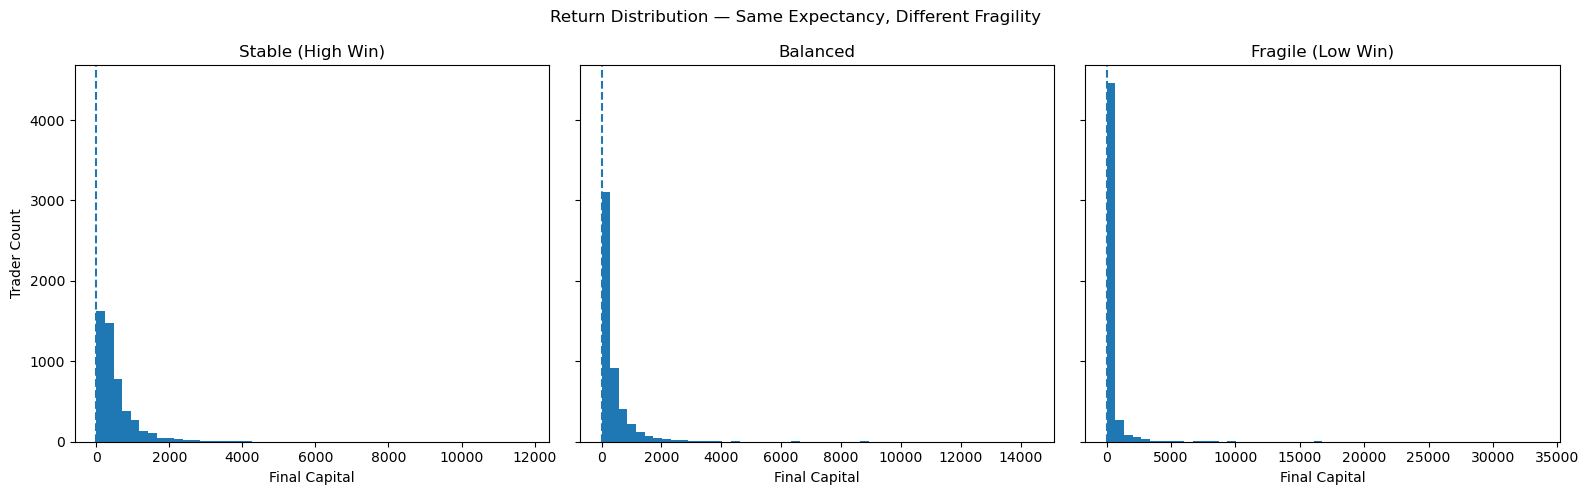

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for ax, (name, data) in zip(axes, results.items()):
    ax.hist(data["finals"], bins=50)
    ax.axvline(start_capital, linestyle="--")
    ax.set_title(name)
    ax.set_xlabel("Final Capital")

axes[0].set_ylabel("Trader Count")
plt.suptitle("Return Distribution — Same Expectancy, Different Fragility")
plt.tight_layout()
plt.show()

# Observation 
Although all systems have identical positive expectancy, their lived outcomes differ dramatically once risk increases.

At 2% risk:

- The Stable system shows zero ruin and strong median growth.
- The Balanced system begins to show small extinction risk and widening dispersion.
- The Fragile system exhibits significant ruin (≈15%) and a much lower median outcome, despite a high mean.

The key insight:

**Expectancy does not determine survival.**   
**Variance interacting with leverage does.**   

The fragile system still has a high average return, but most traders do not experience that average. A small group of extreme winners inflates the mean, while many others either stagnate or die.

This demonstrates that:

- Mean returns can hide extinction risk.
- Median outcomes better represent lived experience.
- Systems must be judged by survival first, not by upside potential.

Positive expectancy is necessary — but robustness determines who actually benefits from it.